In [4]:
import numpy as np
import pandas as pd
import math as m
import cmath
import sympy as sym
import scipy as sci
import matplotlib.ticker as ticker
import random as rand
import matplotlib.pyplot as plt
import cmath as cm
from IPython.display import display, Latex

from sympy import pprint
# from scipy.optimize import minimize as GDlib
from scipy.optimize import minimize 
import MLE_functions_numpy as fnn
from scipy.optimize import fsolve
import pandas as pd
# from minimize import least_squares

In [3]:
pr_num = [sym.lambdify((fn.theta1, fn.theta2, fn.phi1, fn.phi2, fn.alpha), i) for i in fn.pr]   # lambdify the probabilities

xx = [m.pi/12, m.pi/2-m.pi/12, m.pi/4, m.pi/2, m.pi/3]         # 60 deg diff, non zero phi

pppp = [10000*pr_num[i](*xx) for i in range(len(pr_num))]
print(pppp)


[1284.3882311377308, 382.2784355289398, 1614.5833333333364, 2031.596817348357, 893.4573530598154, 1335.102843552896, 579.0467062444684, 454.2324566807027, 1425.3138231137752]


In [9]:
"""
def L(vars, params_tru = [0, m.pi/2, 0, 0, m.pi/4], nj_unnorm = None, lossfn = 'old',  N = 10000):
    if nj_unnorm != None:
        n_unnorm = nj_unnorm
    else:
        num_expt = fn.num_experiment(params= params_tru, N = N)                             # for getting the collapse count
        n_unnorm = num_expt[4]
    n = [i/sum(n_unnorm) for i in n_unnorm]                                                # normalise the counts
    eq_pr = [pr_num[i](*vars) for i in range(len(pr_num))]
    
    lnl_p = [i * np.log(p) if i != 0 else 0 for i, p in zip(n, eq_pr)]                          # manually putting zero for cases of p_i*log(n_i) , if any n_i are 0.
    lnl_n = [i * np.log(i) if i != 0 else 0 for i in n]                         
    del_lnl = [(k-l) for k,l in zip(lnl_p, lnl_n)]
    loss = sum([abs(i) for i in del_lnl])
    if lossfn == 'old':
        loss = sum([abs(i) for i in lnl_p])
    return loss
"""

def L_cross_entropy(p, n):
    lnl_p = [i * np.log(p) if p != 0 else 0 for i, p in zip(n, p)]                          # manually putting zero for cases of p_i*log(n_i) , if any n_i are 0.
    loss = sum([abs(i) for i in lnl_p])
    return loss

In [4]:
# experimental, larger parameters
def L(vars, params_tru = [0, m.pi/2, 0, 0, m.pi/4], nj_unnorm = None, lossfn = 'old',  N = 10000):
    vars = [i*m.pi/180 for i in vars]

    if nj_unnorm != None:
        n_unnorm = nj_unnorm
    else:
        num_expt = fn.num_experiment(params= params_tru, N = N)                             # for getting the collapse count
        n_unnorm = num_expt[4]
    n = [i/sum(n_unnorm) for i in n_unnorm]                                                # normalise the counts
    eq_pr = [pr_num[i](*vars) for i in range(len(pr_num))]

    #raise error if sum not 1, within machine precision
    if abs(sum(eq_pr)-1) > 1e-15 or abs(sum(n)-1) > 1e-15:
        raise ValueError('Sum of probabilities/collapses not 1')
    
    lnl_p = [i * np.log(p) if i != 0 else 0 for i, p in zip(n, eq_pr)]                          # manually putting zero for cases of p_i*log(n_i) , if any n_i are 0.
    lnl_n = [i * np.log(i) if i != 0 else 0 for i in n]                         
    del_lnl = [(k-l) for k,l in zip(lnl_p, lnl_n)]
    loss = 1000*sum([abs(i) for i in del_lnl])
    if lossfn == 'old':
        loss = 1000*sum([abs(i) for i in lnl_p])
    return loss


In [5]:
"""
def c_1_g(params):
    return (m.pi + 1e-12 - params[0])               # 1e-12 is added to avoid the floating point error

def c_2_g(params):
    return (m.pi + 1e-12 - params[1])

def c_3_g(params):
    return (m.pi + 1e-12 - params[2])

def c_4_g(params):
    return (m.pi + 1e-12 - params[3])

def c_5_g(params):
    return (m.pi/2 + 1e-12 - params[4])

def c_1_l(params):
    return (params[0])

def c_2_l(params):
    return (params[1]+ 1e-12)

def c_3_l(params):
    return (params[2]+ 1e-12)

def c_4_l(params):  
    return (params[3]+ 1e-12)

def c_5_l(params):
    return (params[4]+ 1e-12)
"""

def c_1_g(params):
    return (90+ .5 - params[0])               # 1e-12 is added to avoid the floating point error

def c_2_g(params):
    return (90+ .5 - params[1])

def c_3_g(params):
    return (90+ .5 - params[2])

def c_4_g(params):
    return (90+ .5 - params[3])

def c_5_g(params):
    return (90 + 1e-12 - params[4])

def c_1_l(params):
    return (params[0])

def c_2_l(params):
    return (params[1]+ 1e-12)

def c_3_l(params):
    return (params[2]+ 1e-12)

def c_4_l(params):  
    return (params[3]+ 1e-12)

def c_5_l(params):
    return (params[4]+ 1e-12)

cons_ineq = ({'type': 'ineq', 'fun': c_1_g}, {'type': 'ineq', 'fun': c_2_g}, {'type': 'ineq', 'fun': c_3_g}, {'type': 'ineq', 'fun': c_4_g}, {'type': 'ineq', 'fun': c_5_g}, {'type': 'ineq', 'fun': c_1_l}, {'type': 'ineq', 'fun': c_2_l}, {'type': 'ineq', 'fun': c_3_l}, {'type': 'ineq', 'fun': c_4_l}, {'type': 'ineq', 'fun': c_5_l})

In [6]:
# init_guess = [1/5 for i in range(5)]
# init_guess = np.random.rand(5)*90
inv_params = [0.5254370610538157, 1.030984356143689, 0.7670544953445808, -1.6068690955721805, (0.5346630644404312+2.5302074683784063e-17j)]
init_guess = [i*180/m.pi for i in inv_params]
# init_guess = [20 for i in range(5)]
print(init_guess)

# trying for tru = [0, m.pi/2, 0, 0, m.pi/4], 
# nju = [842, 854,1615,799,800,1714,892,813,1671]
nju = [654, 558, 1169, 967,  2313, 521,  1260, 1152,1406]
njn = [i/sum(nju) for i in nju]
minloss = 1000*L_cross_entropy(njn, njn)
sol = minimize(L, init_guess, method = 'CG', args=([0,0,0,0,0], nju, 'old', 10000))

print('min loss =', minloss)
print(sol)
# print([i*180/m.pi for i in sol.x])
print([round(i,8) for i in sol.x])
print('diff loss:', sol.fun - minloss)
fids = fn.fid([m.pi/6, m.pi/2+m.pi/6, m.pi/4, m.pi/2, m.pi/6], [i*m.pi/180 for i in sol.x])
print(fids)
print("ppm error:", [(1-i)*1e6 for i in fids])

[30.1053259981414, 59.07105235104595, 43.948985239781734, -92.06681740628966, (30.63393705396787+1.4497020923056338e-15j)]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x0).astype(float)


NameError: name 'pr_num' is not defined

Above is an overall improvement over inversion method, [126.59257024727478, 74.94125232609949] vs [66.60291782123463, 511.2397426303428] from inversion

Trying if this holds for more states

In [18]:
# trying for other states# params_i = [rand.uniform(0,m.pi) for i in range(5)]
tru = [m.pi/4, m.pi/2+m.pi/4, 0, 0, m.pi/3]
inversion_expt = fn.Inversion_new(params = tru, N = 10000, threshold = 'variable')
nju = inversion_expt[-1]
njn = [i/sum(nju) for i in nju]
minloss = 1000*L_cross_entropy(njn, njn)

inv_params = inversion_expt[2]
inv_degrees = [i*(180/m.pi) for i in inv_params] 
fid_inv = inversion_expt[0]
sol = minimize(L, inv_params , method = 'CG', args=([0,0,0,0,0], nju, 'old', 10000))
print('min loss =', minloss)
print(sol.x)
print('delta loss:', sol.fun - minloss)
fid_opt = fn.fid(tru, [i*m.pi/180 for i in sol.x])

print('nju=' ,nju)
print("fids (inv and opt):", fid_inv, fid_opt)
print("\n ppm errors : ", [(1-i)*1e6 for i in fid_inv], [(1-i)*1e6 for i in fid_opt]) 


min loss = 2039.7868725700605
[ 4.81657952e+01+0.00000000e+00j -4.47912251e+01+0.00000000e+00j
  1.12561612e+02+0.00000000e+00j  4.44149393e-02+0.00000000e+00j
  6.29999348e+02+2.55153344e-19j]
delta loss: 39.13536965922367
nju= [1844, 1844, 0, 914, 1009, 1226, 945, 966, 1252]
fids (inv and opt): [0.9982874589933216, 0.9999878865475892] [0.3093318091014387, 0.9999865724923932]

 ppm errors :  [1712.541006678392, 12.113452410811298] [690668.1908985613, 13.427507606800226]


In [170]:
# trying for other states# params_i = [rand.uniform(0,m.pi) for i in range(5)]
tru = [m.pi/6, m.pi/3, m.pi/6, 0, m.pi/6]
inversion_expt = fn.Inversion_new(params = tru, N = 10000, threshold = 'variable')
nju = inversion_expt[-1]
njn = [i/sum(nju) for i in nju]
minloss = 1000*L_cross_entropy(njn, njn)

inv_params = inversion_expt[2]
inv_degrees = [i*(180/m.pi) for i in inv_params] 
sol = minimize(L, inv_params , method = 'CG', args=([0,0,0,0,0], nju, 'old', 10000))
# fid_opt = fn.fid(tru, [i*m.pi/180 for i in sol.x])
fid_inv = inversion_expt[0]
fid_inv_2 = fn.fid(tru, inv_params)
fid_opt = fn.fid([m.pi/3 ,m.pi/6, 0, m.pi/6, m.pi/6], [i*m.pi/180 for i in sol.x])

print('min loss =', minloss)
print('delta loss:', sol.fun - minloss)
print('nju=' ,nju)
print('tru_deg', [i*180/m.pi for i in tru])
print('params_inv_deg:', [i*180/m.pi for i in inv_params])
print('params_opt',list(sol.x))
print("fids inv 1 and 2 ", fid_inv, fid_inv_2)
print("fids opt:", fid_opt)
print("\n ppm errors : ", [(1-i)*1e6 for i in fid_inv_2], [(1-i)*1e6 for i in fid_opt]) 

min loss = 2009.4164115818755
delta loss: 0.05163152184059072
nju= [207, 241, 644, 1464, 2329, 961, 1130, 1410, 1614]
tru_deg [29.999999999999996, 59.99999999999999, 29.999999999999996, 0.0, 29.999999999999996]
params_inv_deg: [28.04963577060261, 60.42733231312093, 30.451807125045292, 9.314662329283204, (33.28438004504564+5.361481994852912e-16j)]
params_opt [(59.30074804846926+0j), (28.186717843171092+0j), (5.745617483562379+0j), (28.589976827804207+0j), (56.3704662077808+9.357551359657699e-18j)]
fids inv 1 and 2  [0.816680365579283, 0.9950428797034432] [0.9988305329676178, 0.9950428797034432]
fids opt: [0.997941145649785, 0.9988895789327372]

 ppm errors :  [1169.4670323821877, 4957.120296556816] [2058.8543502150224, 1110.421067262779]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x0).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)


In [204]:
# third state 
tru = [m.pi/12, m.pi/2-m.pi/12, m.pi/4, m.pi/2, m.pi/3]         # 60 deg diff, non zero phi
inversion_expt = fn.Inversion_new(params = tru, N = 10000, threshold = 'variable')
nju = inversion_expt[-1]
njn = [i/sum(nju) for i in nju]
minloss = 1000*L_cross_entropy(njn, njn)

inv_params = inversion_expt[2]
inv_degrees = [i*(180/m.pi) for i in inv_params] 
sol = minimize(L, inv_params , method = 'CG', args=([0,0,0,0,0], nju, 'old', 10000))
fid_inv = inversion_expt[0]
fid_inv_2 = fn.fid(tru, inv_params)
# fid_opt = fn.fid(tru, [i*m.pi/180 for i in sol.x])
fid_opt = fn.fid([m.pi/2 - m.pi/12 ,m.pi/12, m.pi/2, m.pi/4, m.pi/3], [i*m.pi/180 for i in sol.x])

print('min loss =', minloss)
print('delta loss:', sol.fun - minloss)
print('nju=' ,nju)
print('tru_deg', [i*180/m.pi for i in tru])
print('params_inv_deg:', [i*180/m.pi for i in inv_params])
print('params_opt',list(sol.x))
print("fids inv 1 and 2 ", fid_inv, fid_inv_2)
print("fids opt:", fid_opt)
print("\n ppm errors : ", [(1-i)*1e6 for i in fid_inv_2], [(1-i)*1e6 for i in fid_opt]) 

min loss = 2078.0448306386947
delta loss: 0.14236487858397595
nju= [1321, 412, 1582, 2022, 878, 1341, 596, 438, 1410]
tru_deg [14.999999999999998, 75.00000000000001, 45.0, 90.0, 59.99999999999999]
params_inv_deg: [15.761130899078898, 74.92131910395693, 50.9501097598867, 91.90760812244044, (60.78609438723522-4.0642229192381135e-16j)]
params_opt [(75.21243379535605+0j), (14.56432788392502+0j), (91.07571327768069+0j), (49.65832512688623+0j), (29.856030187960943-7.093407147572067e-18j)]
fids inv 1 and 2  [0.8555666323402661, 0.7488794009836919] [0.9991193576950071, 0.9999285105013747]
fids opt: [0.9999645067751725, 0.9995401955778442]

 ppm errors :  [880.6423049928513, 71.48949862534337] [35.493224827543024, 459.8044221557629]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)


In [10]:
# state#4 
tru = [m.pi/6, m.pi/2+m.pi/6, m.pi/4, m.pi/2, m.pi/6]
inversion_expt = fn.Inversion_new(params = tru, N = 10000, threshold = 'variable')

print(inversion_expt , '\n\n\n\n\n\n')


# nju = [654, 558,  1169, 967,  2313, 521,  1260, 1152,  1406]      #  the one with results from martin
nju = [618, 594, 1176, 995, 2316, 562, 1241, 1175, 1323]            # the one with fixed seed = 42

njn = [i/sum(nju) for i in nju]
minloss = 1000*L_cross_entropy(njn, njn)

inv_params = inversion_expt[2]
inv_degrees = [i*(180/m.pi) for i in inv_params] 
sol = minimize(L, inv_params , method = 'CG', args=([0,0,0,0,0], nju, 'old', 10000))
fid_inv = inversion_expt[0]
fid_inv_2 = fn.fid(tru, inv_params)
fid_opt = fn.fid(tru, [i*m.pi/180 for i in sol.x])
# fid_opt = fn.fid([m.pi/2 - m.pi/12 ,m.pi/12, m.pi/2, m.pi/4, m.pi/3], [i*m.pi/180 for i in sol.x])

print('min loss =', minloss)
print('delta loss:', sol.fun - minloss)
print('nju=' ,nju)
print('tru_deg', [i*180/m.pi for i in tru])
print('params_inv_deg:', [i*180/m.pi for i in inv_params])
print('params_opt',list(sol.x))
print("fids inv 1 and 2 ", fid_inv, fid_inv_2)
print("fids opt:", fid_opt)
print("\n ppm errors : ", [(1-i)*1e6 for i in fid_inv_2], [(1-i)*1e6 for i in fid_opt]) 

[[0.6227036701786058, 0.21143176641852385], [0.5235987755982988, 2.0943951023931953, 0.7853981633974483, 1.5707963267948966, 0.5235987755982988], [0.521576097141711, 0.9995378104164632, 0.7938745315094559, -1.4832375976446035, (0.5434766612972561+4.3972917736867956e-17j)], Matrix([
[                                                                                 0.4375,                    0.046875*exp(3.14159265358979*I) + 0.140625*exp(1.5707963267949*I), -0.0382732772309871*exp(1.5707963267949*I) + 0.344459495078884*exp(0.785398163397448*I)],
[                     0.046875*exp(3.14159265358979*I) + 0.140625*exp(1.5707963267949*I),                   0.140625*exp(6.28318530717959*I) + 0.046875*exp(3.14159265358979*I),   0.114819831692961*exp(2.35619449019234*I) - 0.114819831692961*exp(4.71238898038469*I)],
[-0.0382732772309871*exp(1.5707963267949*I) + 0.344459495078884*exp(0.785398163397448*I), 0.114819831692961*exp(2.35619449019234*I) - 0.114819831692961*exp(4.71238898038469*I),       

In [9]:
#rough
print([m.pi/6, m.pi/2+m.pi/6, m.pi/4, m.pi/2, m.pi/6])
[0.52359877660388, 2.09439512247384, 0.7853981820616893, 1.5707963651188, 0.5235987727309753]

t2 = [m.pi/12, m.pi/2-m.pi/12, m.pi/4, m.pi/2, m.pi/3]
mart_t2 = [0.2617993891508637, 1.308996936276643, 0.7853981725566438, 1.570796331513264, 1.047197550513876]

nn = [1284.3882311377308, 382.2784355289398, 1614.5833333333364, 2031.596817348357, 893.4573530598154, 1335.102843552896, 579.0467062444684, 454.2324566807027, 1425.3138231137752]
nnn = [i/sum(nn) for i in nn]
print(L_cross_entropy(nnn, nnn))


print(t2)

print(mart_t2)
xxx = [618, 594, 1176, 995, 2316, 562, 1241, 1175, 1323]
xxxn = [i/sum(xxx) for i in xxx]
print(2.1000685499102- L_cross_entropy(xxxn,xxxn))

[0.5235987755982988, 2.0943951023931953, 0.7853981633974483, 1.5707963267948966, 0.5235987755982988]
2.074295099297655
[0.2617993877991494, 1.3089969389957472, 0.7853981633974483, 1.5707963267948966, 1.0471975511965976]
[0.2617993891508637, 1.308996936276643, 0.7853981725566438, 1.570796331513264, 1.047197550513876]
0.00026481591359495127


In [39]:
# trying on the second analysis state sent to martin
tru = [m.pi/12, m.pi/2-m.pi/12, m.pi/4, m.pi/2, m.pi/3]
inversion_expt = fn.Inversion_new(params = tru, N = 10000, threshold = 'variable')
# nju = [654, 558,  1169, 967,  2313, 521,  1260, 1152,  1406]   # "original one"
# below nju is the ideal one, the one that should give back the original prams
nju = [1284.3882311377308, 382.2784355289398, 1614.5833333333364, 2031.596817348357, 893.4573530598154, 1335.102843552896, 579.0467062444684, 454.2324566807027, 1425.3138231137752]
njn = [i/sum(nju) for i in nju]
minloss = 1000*L_cross_entropy(njn, njn)

inv_params = inversion_expt[2]
inv_degrees = [i*(180/m.pi) for i in inv_params] 
sol = minimize(L, inv_params , method = 'CG', args=([0,0,0,0,0], nju, 'old', 10000))
# sol = sol = minimize(L, inv_params, method='CG', args=([0, 0, 0, 0, 0], nju, 'old', 10000), tol=1e-14, options={'disp': True, 'maxiter': 9000, 'gtol': 1e-14})
fid_inv = inversion_expt[0]
fid_inv_2 = fn.fid(tru, inv_params)
fid_opt = fn.fid(tru, [i*m.pi/180 for i in sol.x])
# fid_opt = fn.fid([m.pi/2 - m.pi/12 ,m.pi/12, m.pi/2, m.pi/4, m.pi/3], [i*m.pi/180 for i in sol.x])

print('min loss =', minloss)
print('delta loss:', sol.fun - minloss)
print('nju=' ,nju)
print('tru_deg', [i*180/m.pi for i in tru])
print('params_inv_deg:', [i*180/m.pi for i in inv_params])
print('params_opt',list(sol.x))
print("fids inv 1 and 2 ", fid_inv, fid_inv_2)
print("fids opt:", fid_opt)
print('tru rads', tru)
print('params_opt (radians)', [i*m.pi/180 for i in sol.x])
print("\n ppm errors : ", [(1-i)*1e6 for i in fid_inv_2], [(1-i)*1e6 for i in fid_opt]) 

min loss = 2074.2950992976553
delta loss: 2.502474671928212e-09
nju= [1284.3882311377308, 382.2784355289398, 1614.5833333333364, 2031.596817348357, 893.4573530598154, 1335.102843552896, 579.0467062444684, 454.2324566807027, 1425.3138231137752]
tru_deg [14.999999999999998, 75.00000000000001, 45.0, 90.0, 59.99999999999999]
params_inv_deg: [15.938632498594702, 74.2417233455543, 48.51488956353815, 89.98028138629861, (59.92133826970671+1.4000028905761358e-16j)]
params_opt [(75.00004883482684+0j), (15.000080135645995+0j), (90.00025295568211+0j), (44.99953755786851+0j), (30.00005486539419+2.443465997799146e-18j)]
fids inv 1 and 2  [0.8596120909482755, 0.738452428501244] [0.999483293721481, 0.9998248525006781]
fids opt: [0.21338732738214883, 0.21338866811499993]
tru rads [0.2617993877991494, 1.3089969389957472, 0.7853981633974483, 1.5707963267948966, 1.0471975511965976]
params_opt (radians) [(1.3089977913242652+0j), (0.26180078643002025+0j), (1.5708007417044112+0j), (0.7853900922596537+0j), (0

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x0).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)


The above example shows that gradient descent method is far more powerful than the inversion method and not just that it is advantageous
over the cases when the two states are very close or it outperforms the inversion method in cases with narrower angle between the two 
states Some comments should be made in the write up about how the states are flipped sometimes and sometimes a complementary or a 
supplementary angle is found instead of the exact true value but that can be fixed with post processing. In this particular case though, the difference is staggering, in the ppm errors.

To be Analyzed:

1. nju = [618, 594, 1176, 995, 2316, 562, 1241, 1175, 1323]            # the one with fixed seed = 42
( tru = [m.pi/6, m.pi/2+m.pi/6, m.pi/4, m.pi/2, m.pi/6])
(ppm errors = [17.53122078240743, 3778.704781069342] [112.89701362504623, 4088.8646349209744])

2. 

In [25]:
print(ppm_1[:10: 1])
print(ppm_2[:10: 1])
print(ppm_sum[:10: 1])

[[[4088.6945635246752, 112.8889996271365], 64], [[4088.693396000931, 112.8894347476317], 23], [[4088.6999510078017, 112.88947469634269], 33], [[4088.710509674076, 112.8899354447821], 76], [[4088.705041167873, 112.88996641301009], 6], [[4088.708279979425, 112.88997455893846], 8], [[4088.7026637338454, 112.88998474145995], 93], [[4088.7079494651425, 112.89000577374696], 47], [[4088.7072793666102, 112.89000626812928], 42], [[4088.7074073039375, 112.89001261016729], 82]]
[[[112.8894874207198, 4088.6703954301497], 25], [[112.88955943189461, 4088.705650076907], 4], [[112.88985405810692, 4088.710402142981], 19], [[112.88989184687904, 4088.703923312842], 30], [[112.88992170277456, 4088.704314829106], 7], [[112.88997789848932, 4088.706950651444], 83], [[112.8899792574023, 4088.7083352801887], 22], [[112.88999423941792, 4088.707259336077], 65], [[112.88999724257121, 4088.7062265061445], 35], [[112.88999814895729, 4088.705281010352], 62]]
[[4201.559882850869, [112.8894874207198, 4088.670395430149

In [30]:
min_ang = angles_big_list[ppm_sum[0][2]]
print(min_ang)
print([(i*180/m.pi)%180 for i in min_ang])

print('inv params: \n', inv_params,'\n', [(i*180/m.pi) for i in inv_params])

[3.6703807205512, 5.2709514101513, 0.80674692412529, 1.6922418210186, 3.6828628660014]
[30.297324493769764, 122.00326982019925, 46.22319388753997, 96.95831425989863, 31.01249874733466]
inv params: 
 [0.521576097141711, 0.9995378104164632, 0.7938745315094559, -1.4832375976446035, (0.5434766612972561+4.3972917736867956e-17j)] 
 [29.884109061125486, 57.26929800061075, 45.48566011841731, -84.98325436015911, (31.13891895619371+2.5194625991984937e-15j)]


In [38]:
# evaluate the cross entropy fn at the min ang
print(L(min_ang, [0,0,0,0,0], nju, 'old', 10000))


3142.3304202743057



Comparing inversion and optimization results for the case when collapse vector equals probability Ideally we expect The optimized parameters in both the cases to be exactly Same as the input parameters up to machine error Now this remains to be seen that which one of them is more accurate. 

In [7]:
# ppm errors for ideal case when n = p . 

tru = [m.pi/4, m.pi/4+m.pi/2, 0, 0, m.pi/3]
nju = [i*1000 for i in fn.pr_num(tru)]                     # collapse = prob, for 1000 cases
print(nju)
inversion_expt = fn.Inversion_new(params = tru, N = 10000, threshold = 'variable', nju = nju)
inv_params = inversion_expt[2]
fid_inv_2 = fn.fid(tru, inv_params)



minloss = fn.L(n = nju)

print(inversion_expt)

sol = minimize(fn.L, inv_params , method = 'CG', args=(nju))

print(minloss)
print(sol.fun)

fid_opt = fn.fid(tru, sol.x)
print("fids inv 2 ", fid_inv_2)
print("fids opt:", fid_opt)
print("\n ppm errors : ", [(1-i)*1e6 for i in fid_inv_2], [(1-i)*1e6 for i in fid_opt]) 


# fn to compare the accuracy - calculate ppm errors for a fixed tru and nju
def ppm_errors(tru, nju):
    
    inversion_expt = fnn.Inversion_new(params = tru, N =int(sum(nju)), threshold = 'variable', nju = nju)
    inv_params = inversion_expt[2]

    sol = minimize(fn.L, inv_params , method = 'CG', args=(nju))
    
    
    fid_inv_0 = fnn.fid(tru, inv_params)
    fid_inv_1 = fnn.fid([tru[1], tru[0], tru[3], tru[2], tru[4]], inv_params)
    fid_opt_0 = fnn.fid(tru, sol.x)
    fid_opt_1 = fnn.fid([tru[1], tru[0], tru[3], tru[2], tru[4]], sol.x)

    # choosing the biiger sum of fids, coz sometimes states come out "flipped"
    if sum(fid_inv_0) > sum(fid_inv_1):
        fid_inv = fid_inv_0
    else:
        fid_inv = fid_inv_1
    
    if sum(fid_opt_0) > sum(fid_opt_1):
        fid_opt = fid_opt_0
    else:
        fid_opt = fid_opt_1
    
    ppm_errors_inv = [(1-i)*1e6 for i in fid_inv]
    ppm_errors_opt = [(1-i)*1e6 for i in fid_opt]
    x= 7#dummy
    return [ppm_errors_inv, ppm_errors_opt]

[183.92556509887933, 183.92556509888004, -5.782411586589369e-15, 95.53721745056049, 95.53721745056049, 125.00000000000055, 95.53721745056049, 95.53721745056049, 125.00000000000055]
[[0.9999999999999998, 0.9999999999999998], [0.7853981633974483, 2.356194490192345, 0, 0, 1.0471975511965976], [0.7853981633974484, 0.7853981633974484, 0.0, 3.141592653589793, (1.0471975511965996-9.718306435161888e-19j)], Matrix([
[              0.25,               0.25, -0.176776695296637],
[              0.25,               0.25, -0.176776695296637],
[-0.176776695296637, -0.176776695296637,                0.5]]), array([[ 0.25     +0.00000000e+00j,  0.25     -2.77555756e-17j,
        -0.1767767-6.93889390e-18j],
       [ 0.25     +2.77555756e-17j,  0.25     +1.76612331e-18j,
        -0.1767767+0.00000000e+00j],
       [-0.1767767+6.93889390e-18j, -0.1767767+0.00000000e+00j,
         0.5      +8.00198397e-19j]]), [0.183925565099, 0.183925565099, 0, 0.095537217451, 0.095537217451, 0.125000000000, 0.0955372174

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)


In [14]:
#Agenda now:
    #   Choose some state/parameters
    #  Generate using say 1000 experiments, the collapse counts for the state
	# •	Create a histogram with sum of ppm errors on the x-axis and frequency on the y-axis.
	# •	Compare the frequency distribution for inversion and optimization methods.

#1
tru = [m.pi/6, m.pi/2+m.pi/6, m.pi/4, m.pi/2, m.pi/6]

#2 -we already have generated data for 2500 experiments 

# for this particular parameters and also the optimized result for each of those from martin
# importing the csv file and the first 500 collapse vectors from it.

tru = [m.pi/6, m.pi/2+m.pi/6, m.pi/4, m.pi/2, m.pi/6]
df_nju = pd.read_csv('collapses_data_30_120.csv')
# Select the first 500 rows
df_500 = df_nju.head(500)
nju_500 = df_500.values.tolist()

#3  Running code to find the ppm errors for the 500 collapse vectors
ppm_errors_500 = [ppm_errors(tru, i) for i in nju_500]
ppm_sums_500 = [[sum(i[j]) for j in range(2)] for i in ppm_errors_500]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x0).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)


In [30]:
#3  Running code to find the ppm errors for the 500 collapse vectors
ppm_errors_500 = [ppm_errors(tru, i) for i in nju_500]
ppm_sums_500 = [[sum(i[j]) for j in range(2)] for i in ppm_errors_500]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x0).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Framew

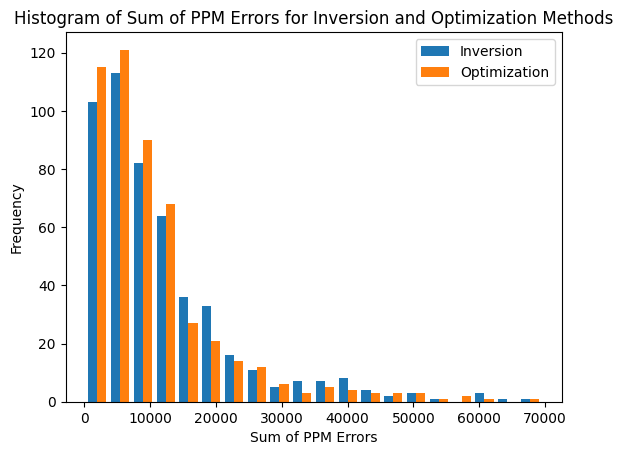

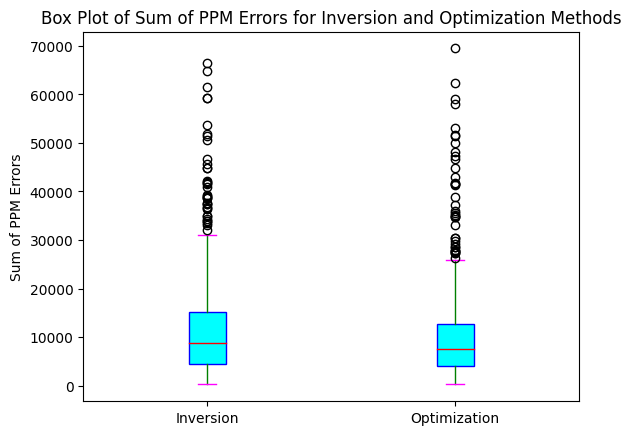

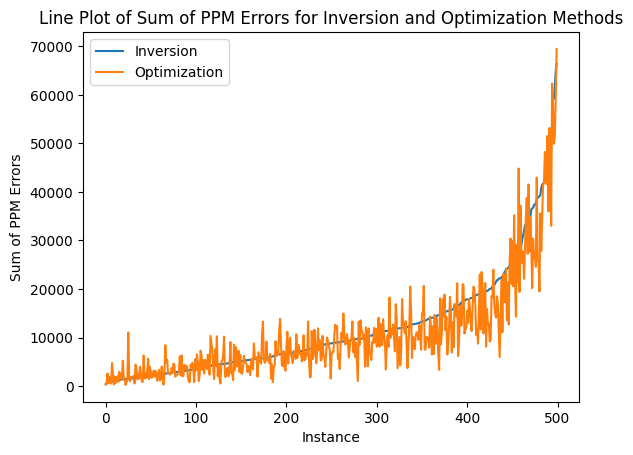

In [47]:
# Creting histograms

# Separate the ppm errors for the inversion and optimization methods
ppm_errors_inversion = [i[0] for i in ppm_sums_500]
ppm_errors_optimization = [i[1] for i in ppm_sums_500]

# Create a histogram
plt.hist([ppm_errors_inversion, ppm_errors_optimization], bins=20, histtype='bar', stacked=False, label=['Inversion', 'Optimization'])
plt.xlabel('Sum of PPM Errors')
plt.ylabel('Frequency')
plt.title('Histogram of Sum of PPM Errors for Inversion and Optimization Methods')
plt.legend()
plt.show()

# Create a box plot
# plt.boxplot([ppm_errors_inversion, ppm_errors_optimization], labels=['Inversion', 'Optimization'])
plt.boxplot([ppm_errors_inversion, ppm_errors_optimization], labels=['Inversion', 'Optimization'], 
            patch_artist=True, 
            boxprops=dict(facecolor='cyan', color='blue'), 
            medianprops=dict(color='red'), 
            whiskerprops=dict(color='green'), 
            capprops=dict(color='magenta'), 
            flierprops=dict(color='yellow', markeredgecolor='black'))


plt.ylabel('Sum of PPM Errors')
plt.title('Box Plot of Sum of PPM Errors for Inversion and Optimization Methods')
plt.show()




"""# Create a line plot

# sorting errors for better visualization
ppm_sums_sorted = sorted(ppm_sums_500, key=lambda x: x[0])
ppm_errors_inversion = [i[0] for i in ppm_sums_sorted]
ppm_errors_optimization = [i[1] for i in ppm_sums_sorted]

plt.plot(ppm_errors_inversion, label='Inversion')
plt.plot(ppm_errors_optimization, label='Optimization')

# Add labels
plt.xlabel('Instance')
plt.ylabel('Sum of PPM Errors')
plt.title('Line Plot of Sum of PPM Errors for Inversion and Optimization Methods')
plt.legend()

# Show the plot
plt.show()
"""

In [54]:
# statistical properties of the two... error data due to inversion and optimization improving that optimization is lower or better

average_inversion = np.mean(ppm_errors_inversion)
average_optimization = np.mean(ppm_errors_optimization)

# Calculate the standard deviations
std_dev_inversion = np.std(ppm_errors_inversion)
std_dev_optimization = np.std(ppm_errors_optimization)

# Calculate the sum of differences
avg_difference = np.sum( np.array(ppm_errors_inversion)-np.array(ppm_errors_optimization))/len(ppm_errors_inversion)


print(f"Average of PPM Inversion Errors: {average_inversion}")
print(f"Average of PPM Optimization Errors: {average_optimization}")
print(f"Standard Deviation of PPM Errors : Inversion Method: {std_dev_inversion}")
print(f"Standard Deviation of PPM Errors : Optimization Method: {std_dev_optimization}")
print(f"Sum of Differences between Optimization and Inversion PPM Errors: {avg_difference}")

Average of PPM Inversion Errors: 11877.033872607617
Average of PPM Optimization Errors: 10637.459627635579
Standard Deviation of PPM Errors : Inversion Method: 11211.70140824951
Standard Deviation of PPM Errors : Optimization Method: 10505.637286378516
Sum of Differences between Optimization and Inversion PPM Errors: 1239.5742449720346


Condensing the above code in order to repeat the process for different states, and producing diagrams.

In [19]:
# Streamlining the whole thing.

# Algo for generating and storing nju vectors
def generate_collapse_data(params, N=1000, N_expt=2500):
    nju_big_list = []
    for _ in range(N_expt):
        nju = fn.num_experiment(N=N, params=params, seed=None, an_pr=True)[4]
        nju_big_list.append(nju)
    return nju_big_list
# collapse_data = generate_collapse_data(tru, 2)   # Eg use

# For plotting and comparing the ppm errors
def plot_ppm_errors(tru, nju_list, bins =25):
    # Calculate the ppm errors
    ppm_errors_list = [ppm_errors(tru, nju) for nju in nju_list]
    ppm_sums_list = [[sum(i[j]) for j in range(2)] for i in ppm_errors_list]

    # Separate the ppm errors for the inversion and optimization methods
    ppm_errors_inversion = [i[0] for i in ppm_sums_list]
    ppm_errors_optimization = [i[1] for i in ppm_sums_list]

    # Create a histogram
    plt.hist([ppm_errors_inversion, ppm_errors_optimization], bins=bins, histtype='bar', stacked=False, label=['Inversion', 'Optimization'])
    plt.xlabel('Sum of PPM Errors')
    plt.ylabel('Frequency')
    plt.title('Histogram of Sum of PPM Errors for Inversion and Optimization Methods')
    plt.legend()
    plt.show()

    # Create a box plot
    plt.boxplot([ppm_errors_inversion, ppm_errors_optimization], labels=['Inversion', 'Optimization'], 
                patch_artist=True, 
                boxprops=dict(facecolor='cyan', color='blue'), 
                medianprops=dict(color='red'), 
                whiskerprops=dict(color='green'), 
                capprops=dict(color='magenta'), 
                flierprops=dict(color='yellow', markeredgecolor='black'))
    plt.ylabel('Sum of PPM Errors')
    plt.title('Box Plot of Sum of PPM Errors for Inversion and Optimization Methods')
    plt.show()

    # Calculate the statistical properties
    average_inversion = np.mean(ppm_errors_inversion)
    average_optimization = np.mean(ppm_errors_optimization)
    std_dev_inversion = np.std(ppm_errors_inversion)
    std_dev_optimization = np.std(ppm_errors_optimization)
    avg_difference = np.sum(np.array(ppm_errors_inversion) - np.array(ppm_errors_optimization)) / len(ppm_errors_inversion)
    std_dev_difference = np.std(np.array(ppm_errors_inversion) - np.array(ppm_errors_optimization))

    print(f"Average of PPM Inversion Errors: {average_inversion}")
    print(f"Average of PPM Optimization Errors: {average_optimization}")
    print(f"Standard Deviation of PPM Errors : Inversion Method: {std_dev_inversion}")
    print(f"Standard Deviation of PPM Errors : Optimization Method: {std_dev_optimization}")
    print(f"Average Difference between Optimization and Inversion PPM Errors: {avg_difference}")
    print(f"Standard Deviation of Differences between Optimization and Inversion PPM Errors: {std_dev_difference}")
    
    return [ppm_errors_inversion, ppm_errors_optimization]



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x0).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x0).astype(float)
/Library/Frame

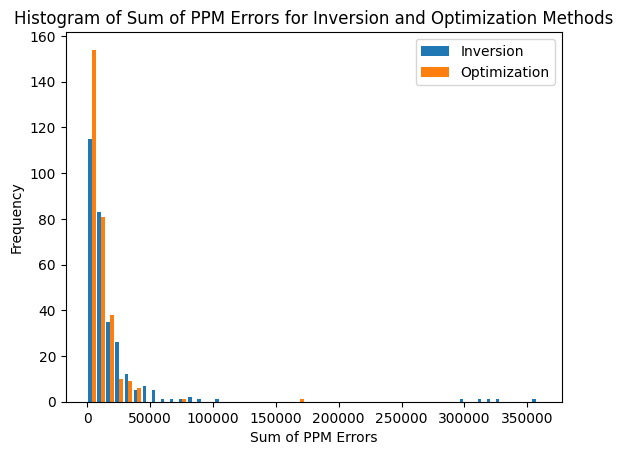

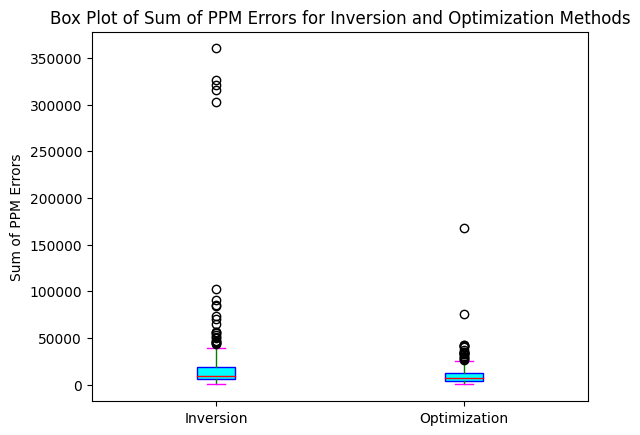

Average of PPM Inversion Errors: 19912.389820850276
Average of PPM Optimization Errors: 10297.947712974046
Standard Deviation of PPM Errors : Inversion Method: 42781.64250890695
Standard Deviation of PPM Errors : Optimization Method: 13026.54643201218
Average Difference between Optimization and Inversion PPM Errors: 9614.442107876226
Standard Deviation of Differences between Optimization and Inversion PPM Errors: 39953.14328956565


In [60]:
# for state [m.pi/12, m.pi/2-m.pi/12, m.pi/4, m.pi/2, m.pi/3]
tru = [m.pi/12, m.pi/2-m.pi/12, m.pi/4, m.pi/2, m.pi/3]
df_nju = pd.read_csv('collapses_data_15_75.csv')
nju_1000 = df_nju.head(1000).values.tolist()

errors = plot_ppm_errors(tru, nju_1000[:300], bins = 50)

errors_inv = errors[0]
errors_opt = errors[1]

In [62]:
# sort error opt and fid lists
errors_inv_sorted = sorted(errors_inv, reverse = True)
errors_opt_sorted = sorted(errors_opt, reverse = True)

print(errors_inv_sorted[:10])
print(errors_opt_sorted[:10])

errors_inv.index(360207.8940199598)


[360207.8940199598, 326410.04558730504, 321091.3482430269, 316012.67360980576, 302490.44486860174, 102283.55379908271, 90593.76265650919, 85143.9196662439, 84124.02384552719, 73520.42483849752]
[167882.13227751513, 75540.23217617911, 42231.0919785297, 42102.98818561853, 41760.5365512439, 41670.73505437891, 40673.4296265775, 37262.959991536394, 35277.930134496644, 34811.613705942436]


87

In [80]:
print(errors_inv[87], errors_opt[87])

print(nju_1000[87])
print(nju_1000[86])
print([1000*i for i in fn.pr_num(tru)])

360207.8940199598 33786.93600674487
[129, 48, 175, 215, 77, 108, 56, 54, 138]
[121, 37, 164, 216, 111, 140, 53, 38, 120]
[128.43882311377308, 38.22784355289398, 161.45833333333366, 203.15968173483571, 89.34573530598153, 133.5102843552896, 57.90467062444684, 45.423245668070265, 142.5313823113775]


In [84]:
print('','ppm errors', ppm_errors(tru, nju_1000[87]))
# print('','ppm errors', ppm_errors(tru, nju_1000[86]))

# print('','sum', 66987.29810778059+ 293220.5959121792, 28471.501904479777+ 5315.434102265093)
# to investigate why such huge error in the inversion and why such drastic decrease in the opt

 ppm errors [[66987.29810778059, 293220.5959121792], [28471.501904479777, 5315.434102265093]]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x0).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)


In [117]:
# first source of error, the nju is off
nju87 = nju_1000[87]
print(nju87)
# print(fn.pr_num(tru))
new_expt_inv = fn.Inversion_new(params = tru, N =int(sum(nju)), threshold = .12 , nju = nju87)

# inv_params = [0.07650803207749929, 1.2629537720011492, -0.5588882624333877, 1.499793587127234, (1.11282608351433-6.778017923021832e-19j)]     # for threshold = .05
inv_params = new_expt_inv[2]

#degree
print([i*180/m.pi for i in inv_params])
print([i*180/m.pi for i in tru])
#ppm 

print('','built in fid', new_expt_inv[0])
print('','ppm buil in', [(1-i)*1e6 for i in new_expt_inv[0]])

print(fn.fid(tru, inv_params))
print([(1-i)*1e6 for i in fn.fid(tru, inv_params)])

# second - optimization algo is giving very far off results
# [(45.000000000000014+0j), (45.000000000000014+0j), 0j, (180+0j), (60.0000)]
# [14.999999999999998, 75.00000000000001, 45.0, 90.0, 59.99999999999999]   (tru)
# [63489.153514802885, 2482.2592781309495]

[129, 48, 175, 215, 77, 108, 56, 54, 138]
[0.0, 72.17487222235692, 0.0, -84.68422845455143, (63.945944102830886+7.472760531868533e-18j)]
[14.999999999999998, 75.00000000000001, 45.0, 90.0, 59.99999999999999]
 built in fid [0.9330127018922194, 0.9969440521410621]
 ppm buil in [66987.29810778059, 3055.947858937924]
[0.9330127018922194, 0.7067794040878208]
[66987.29810778059, 293220.5959121792]


# Trying Again
with the modified numpy based functions and new fidelity fn

In [ ]:
# Updated example for the new code, comparison inversion and Opt. 

# state#4 
tru = [m.pi/6, m.pi/2+m.pi/6, m.pi/4, m.pi/2, m.pi/6]
nju = [618, 594, 1176, 995, 2316, 562, 1241, 1175, 1323]            # the one with fixed seed = 42
inversion_expt = fnn.Inversion_new(params = tru, N = 10000, threshold = 'variable', nju = nju)

# nju = [654, 558,  1169, 967,  2313, 521,  1260, 1152,  1406]      #  the one with results from martin
njn = [i/sum(nju) for i in nju]
# minloss = 1000*fnn.L(n= njn)

inv_params = inversion_expt[2]
inv_degrees = [i*(180/m.pi) for i in inv_params] 
# sol = minimize(fnn.L, inv_params , method = 'CG', args=([0,0,0,0,0], nju, 'old', 10000))
sol = minimize(fnn.L, inv_params , method = 'CG', args=(nju))
fid_inv = inversion_expt[0]
fid_inv_2 = fnn.fid(tru, inv_params)
fid_opt = fnn.fid(tru, sol.x)
# fid_opt = fnn.fid([tru[1], tru[0], tru[3], tru[2], tru[4]], sol.x)

print('min loss =', minloss)
print('delta loss:', 1000*sol.fun - minloss)
print('nju=' ,nju)
print('tru_deg', [i*180/m.pi for i in tru])
print('params_inv:', inv_params)
print('params_inv_deg:', [i*180/m.pi for i in inv_params])
print('params_opt',list(sol.x))
print('params_opt_deg',[i*180/m.pi for i in list(sol.x)])
print("fids inv 1 and 2 ", fid_inv, fid_inv_2)
print("fids opt:", fid_opt)
print("\n ppm errors : ", [(1-i)*1e6 for i in fid_inv_2], [(1-i)*1e6 for i in fid_opt]) 

In [14]:
#creating the collapse vectors or actually reading it in this case and then finding corresponding ppm errors for both the methods.
tru = [m.pi/6, m.pi/2+m.pi/6, m.pi/4, m.pi/2, m.pi/6]
df_nju = pd.read_csv('collapses_data_30_120.csv')
# Select the first 500 rows
df_500 = df_nju.head(500)
nju_500 = df_500.values.tolist()

#3  Running code to find the ppm errors for the 500 collapse vectors
ppm_errors_500 = [ppm_errors(tru, i) for i in nju_500]
ppm_sums_500 = [[sum(i[j]) for j in range(2)] for i in ppm_errors_500]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x0).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Framew

In [10]:
# analyzing why the fidelity is so low for some cases of optimization method

# ppm_errors_500
print(nju_500[3])
ppm_errors(tru, nju_500[3])
# nju_500
# ppm_errors_500

[67, 47, 115, 114, 234, 63, 111, 103, 146]


[[512.1063716235774, 29777.08143612501],
 [321.2588587939713, 27566.576478908035]]

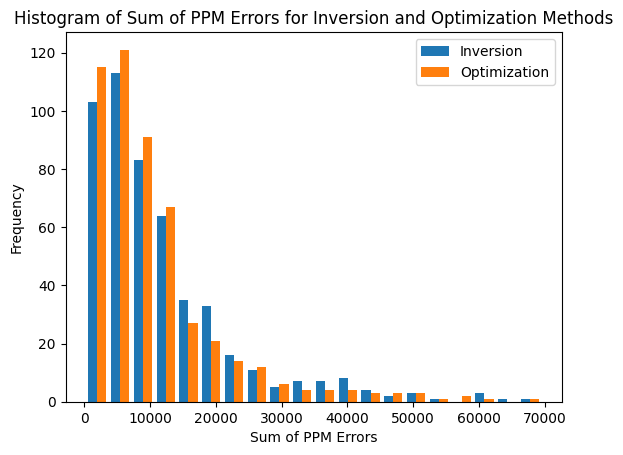

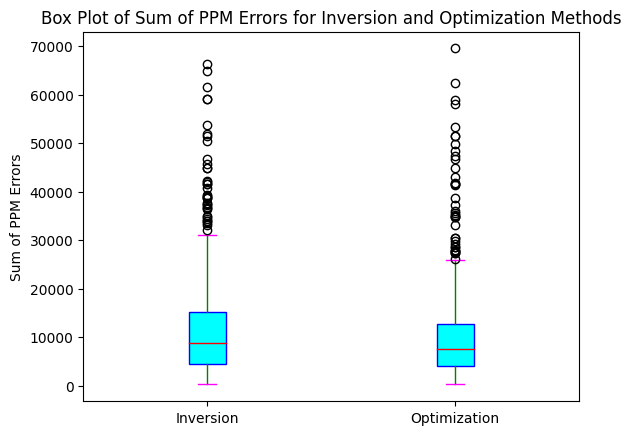

Average of PPM Inversion Errors: 11877.033871890224
Average of PPM Optimization Errors: 10638.076441474874
Standard Deviation of PPM Errors : Inversion Method: 11211.701406937676
Standard Deviation of PPM Errors : Optimization Method: 10506.836352116208
Average Difference between Optimization and Inversion PPM Errors: 1238.9574304153507


NameError: name 'std_dev_difference' is not defined

In [16]:
# Creting histograms
# Separate the ppm errors for the inversion and optimization methods
ppm_errors_inversion = [i[0] for i in ppm_sums_500]
ppm_errors_optimization = [i[1] for i in ppm_sums_500]

# Create a histogram
plt.hist([ppm_errors_inversion, ppm_errors_optimization], bins=20, histtype='bar', stacked=False, label=['Inversion', 'Optimization'])
plt.xlabel('Sum of PPM Errors')
plt.ylabel('Frequency')
plt.title('Histogram of Sum of PPM Errors for Inversion and Optimization Methods')
plt.legend()
plt.show()

# Create a box plot
# plt.boxplot([ppm_errors_inversion, ppm_errors_optimization], labels=['Inversion', 'Optimization'])
plt.boxplot([ppm_errors_inversion, ppm_errors_optimization], labels=['Inversion', 'Optimization'], 
            patch_artist=True, 
            boxprops=dict(facecolor='cyan', color='blue'), 
            medianprops=dict(color='red'), 
            whiskerprops=dict(color='green'), 
            capprops=dict(color='magenta'), 
            flierprops=dict(color='yellow', markeredgecolor='black'))
plt.ylabel('Sum of PPM Errors')
plt.title('Box Plot of Sum of PPM Errors for Inversion and Optimization Methods')
plt.show()

average_inversion = np.mean(ppm_errors_inversion)
average_optimization = np.mean(ppm_errors_optimization)

# Calculate the standard deviations
std_dev_inversion = np.std(ppm_errors_inversion)
std_dev_optimization = np.std(ppm_errors_optimization)

# Calculate the sum of differences
avg_difference = np.sum( np.array(ppm_errors_inversion)-np.array(ppm_errors_optimization))/len(ppm_errors_inversion)


print(f"Average of PPM Inversion Errors: {average_inversion}")
print(f"Average of PPM Optimization Errors: {average_optimization}")
print(f"Standard Deviation of PPM Errors : Inversion Method: {std_dev_inversion}")
print(f"Standard Deviation of PPM Errors : Optimization Method: {std_dev_optimization}")
print(f"Average Difference between Optimization and Inversion PPM Errors: {avg_difference}")

# working perfectly!
now generalizing it using a function and creating more plots dots.

In [10]:
def plot_ppm_errors(tru, nju_list, bins =25):
    # Calculate the ppm errors
    ppm_errors_list = [ppm_errors(tru, nju) for nju in nju_list]
    ppm_sums_list = [[sum(i[j]) for j in range(2)] for i in ppm_errors_list]

    # Separate the ppm errors for the inversion and optimization methods
    ppm_errors_inversion = [i[0] for i in ppm_sums_list]
    ppm_errors_optimization = [i[1] for i in ppm_sums_list]

    # Create a histogram
    plt.hist([ppm_errors_inversion, ppm_errors_optimization], bins=bins, histtype='bar', stacked=False, label=['Inversion', 'Optimization'])
    plt.xlabel('Sum of PPM Errors')
    plt.ylabel('Frequency')
    plt.title('Histogram of Sum of PPM Errors for Inversion and Optimization Methods')
    plt.legend()
    plt.show()

    # Create a box plot
    plt.boxplot([ppm_errors_inversion, ppm_errors_optimization], labels=['Inversion', 'Optimization'], 
                patch_artist=True, 
                boxprops=dict(facecolor='cyan', color='blue'), 
                medianprops=dict(color='red'), 
                whiskerprops=dict(color='green'), 
                capprops=dict(color='magenta'), 
                flierprops=dict(color='yellow', markeredgecolor='black'))
    plt.ylabel('Sum of PPM Errors')
    plt.title('Box Plot of Sum of PPM Errors for Inversion and Optimization Methods')
    plt.show()

    # Calculate the statistical properties
    average_inversion = np.mean(ppm_errors_inversion)
    average_optimization = np.mean(ppm_errors_optimization)
    std_dev_inversion = np.std(ppm_errors_inversion)
    std_dev_optimization = np.std(ppm_errors_optimization)
    avg_difference = np.sum(np.array(ppm_errors_inversion) - np.array(ppm_errors_optimization)) / len(ppm_errors_inversion)
    std_dev_difference = np.std(np.array(ppm_errors_inversion) - np.array(ppm_errors_optimization))

    print(f"Average of PPM Inversion Errors: {average_inversion}")
    print(f"Average of PPM Optimization Errors: {average_optimization}")
    print(f"Standard Deviation of PPM Errors : Inversion Method: {std_dev_inversion}")
    print(f"Standard Deviation of PPM Errors : Optimization Method: {std_dev_optimization}")
    print(f"Average Difference between Optimization and Inversion PPM Errors: {avg_difference}")
    
    return [ppm_errors_inversion, ppm_errors_optimization]

In [ ]:
# Doing for the following three parameters: 

# For tru = [m.pi/6, m.pi/2+m.pi/6, m.pi/4, m.pi/2, m.pi/6]     # 90 deg, non zero phi
# For tru = [m.pi/12, m.pi/2-m.pi/12, m.pi/4, m.pi/2, m.pi/3]   # 60 deg diff, non zero phi
# For tru = [m.pi/6, m.pi/3, 0, m.pi/4, m.pi/12]                # 30 deg diff, very uneven alpha

In [24]:
#Generating collapse data for the states, so to use later
# For tru = [m.pi/6, m.pi/2+m.pi/6, m.pi/4, m.pi/2, m.pi/6]     # 90 deg, non zero phi
# For tru = [m.pi/12, m.pi/2-m.pi/12, m.pi/4, m.pi/2, m.pi/3]   # 60 deg diff, non zero phi
# For tru = [m.pi/6, m.pi/3, 0, m.pi/4, m.pi/12]                # 30 deg diff, very uneven alpha
"""
tru = [m.pi/6, m.pi/2+m.pi/6, m.pi/4, m.pi/2, m.pi/6]

# generate and write into csv file the nju data
collapse_data = generate_collapse_data(tru, N = 1000, N_expt = 1000)
df = pd.DataFrame(collapse_data)
df.to_csv('collapses_(30 120 45 90 30) 1k 1k.csv', index=False)

# repeating the above for the other two states

tru = [m.pi/12, m.pi/2-m.pi/12, m.pi/4, m.pi/2, m.pi/3]
collapse_data = generate_collapse_data(tru, N = 1000, N_expt = 1000)
df = pd.DataFrame(collapse_data)
df.to_csv('collapses_(15 75 45 90 60) 1k 1k.csv', index=False)

tru = [m.pi/6, m.pi/3, 0, m.pi/4, m.pi/12]
collapse_data = generate_collapse_data(tru, N = 1000, N_expt = 1000)
df = pd.DataFrame(collapse_data)
df.to_csv('collapses_(30 60 0 45 15) 1k 1k.csv', index=False)

"""

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x0).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Framew

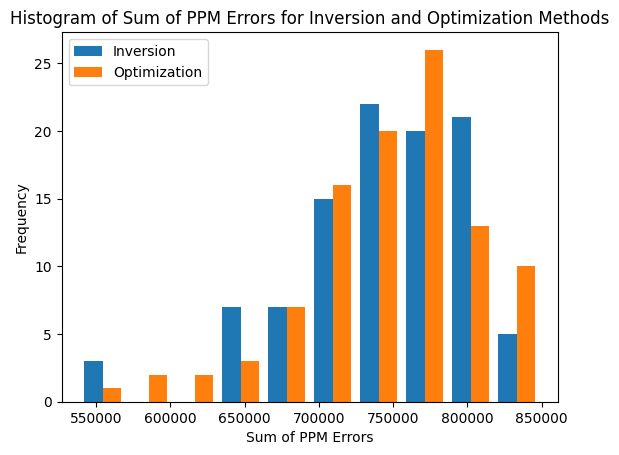

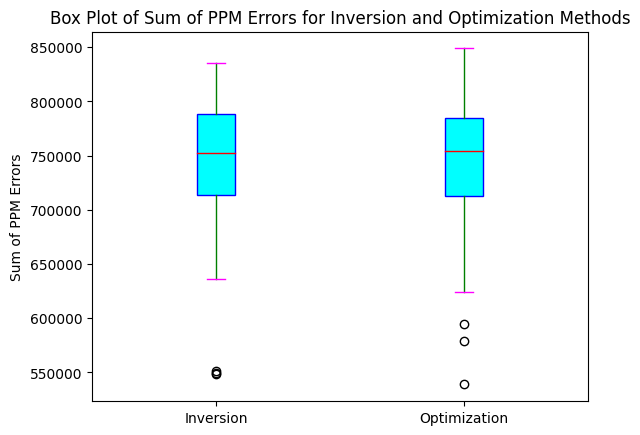

Average of PPM Inversion Errors: 741886.9819636872
Average of PPM Optimization Errors: 746750.0960590112
Standard Deviation of PPM Errors : Inversion Method: 59520.49153829509
Standard Deviation of PPM Errors : Optimization Method: 58354.21041092595
Average Difference between Optimization and Inversion PPM Errors: -4863.1140953241975
Standard Deviation of Differences between Optimization and Inversion PPM Errors: 22454.92140405283


[[835639.0995305391,
  741102.6689564219,
  718062.6520932056,
  754457.6029193399,
  740002.1578988916,
  659537.5475908975,
  808876.2068236889,
  705530.7104221866,
  776453.930289988,
  817437.2930167541,
  663501.1514462775,
  761227.078753975,
  644341.1746473886,
  784631.8814224573,
  696374.6288413325,
  551323.1650040323,
  638408.26745034,
  697504.4574636465,
  726827.8204063523,
  549618.2778622411,
  707400.5157185486,
  779241.2173329816,
  764519.7956023947,
  809525.6405115945,
  719518.9111861739,
  778096.6566690892,
  548695.1637895074,
  816803.6568116654,
  704662.6137463336,
  725529.2550953795,
  793676.3398414715,
  643538.4671908644,
  791979.5380928029,
  788467.913976048,
  794343.3236456496,
  744004.7742625963,
  791555.2316462146,
  669907.2575686185,
  731097.8650559322,
  638528.9373064269,
  758778.1959369206,
  821713.9605550638,
  807001.2141659594,
  636395.6551642519,
  760109.3500915846,
  720737.5833848834,
  741656.0862804687,
  715538.305236932

In [29]:
# For state 1 : tru = [m.pi/6, m.pi/2+m.pi/6, m.pi/4, m.pi/2, m.pi/6]     # 90 deg, non zero phi

# create big nju list
tru1 = [m.pi/6, m.pi/2+m.pi/6, m.pi/4, m.pi/2, m.pi/6]
nju_100_1 = generate_collapse_data(tru1, N = 1000, N_expt = 100)

# Running the funciton to create plots and statistics
plot_ppm_errors(tru, nju_100_1, bins = 10)


In [34]:
nju_100_1[0]

[69, 48, 111, 79, 267, 49, 104, 127, 146]

In [43]:
#Rough debuggin
#Rough debuggin
#Rough debuggin


tru = [m.pi/6, m.pi/2+m.pi/6, m.pi/4, m.pi/2, m.pi/6]

p = fnn.pr_num(tru)
print(p)

# for i in range(100):
#     print(i, nju_100_1[i])
#     print(ppm_errors(tru, nju_100_1[i]))

bad_nju =[62, 62, 122, 105, 224, 48, 107, 134, 136]
# fids = [[950.6942688717323, 27820.087456573274], [187.4842991544945, 30227.76153229889]]


good_nju = [64, 56, 118, 98, 237, 59, 110, 114, 144]
# [[156.79635840082364, 678.9275642737902], [102.21889304484755, 869.8423084217976]]


err = ppm_errors(tru, bad_nju)
# err2 = ppm_errors(tru, good_nju)
# nju_ex = 
err

[0.06668670613173643, 0.054226785061875796, 0.11979166666666691, 0.09757351656601276, 0.23527556401302308, 0.05575922586427129, 0.11698977730225153, 0.11674765092510275, 0.13694910746906236]


[[950.6942688717323, 27820.087456573274],
 [187.4842991544945, 30227.76153229889]]

0 [139, 35, 150, 194, 94, 141, 50, 54, 143]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x0).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)


1 [130, 47, 159, 187, 118, 123, 58, 45, 133]
2 [140, 37, 188, 182, 84, 125, 50, 44, 150]
3 [144, 45, 148, 200, 85, 148, 57, 36, 137]
4 [133, 34, 167, 212, 93, 137, 59, 42, 123]
5 [139, 38, 177, 193, 84, 131, 50, 45, 143]
6 [105, 43, 197, 175, 81, 148, 53, 45, 153]
6 [105, 43, 197, 175, 81, 148, 53, 45, 153] [[66987.29810778059, 194204.6763716354], [14995.015143469236, 1610.9217236101038]]
7 [131, 35, 164, 191, 93, 147, 60, 36, 143]
8 [117, 40, 172, 191, 84, 147, 70, 39, 140]
9 [148, 33, 159, 207, 90, 131, 68, 39, 125]
10 [142, 47, 157, 193, 75, 135, 49, 59, 143]
11 [139, 35, 152, 206, 87, 136, 53, 39, 153]
12 [140, 42, 165, 192, 101, 122, 56, 51, 131]
13 [143, 51, 170, 207, 81, 127, 56, 56, 109]
14 [116, 32, 164, 232, 89, 125, 66, 37, 139]
15 [118, 36, 167, 196, 89, 146, 56, 44, 148]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)


16 [112, 40, 163, 200, 95, 148, 63, 51, 128]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x0).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)


17 [127, 39, 161, 213, 87, 138, 62, 43, 130]
18 [121, 42, 164, 187, 78, 146, 65, 49, 148]
19 [134, 37, 165, 193, 86, 142, 53, 51, 139]
20 [145, 43, 151, 194, 99, 131, 56, 40, 141]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)


21 [120, 39, 177, 176, 106, 137, 47, 58, 140]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x0).astype(float)


22 [136, 34, 159, 217, 83, 120, 56, 41, 154]
23 [145, 40, 141, 181, 98, 129, 68, 44, 154]
24 [153, 40, 159, 184, 83, 129, 53, 56, 143]
25 [134, 39, 176, 202, 69, 146, 44, 34, 156]
26 [125, 46, 151, 189, 115, 138, 42, 35, 159]
27 [132, 45, 160, 205, 80, 133, 66, 39, 140]
28 [136, 29, 159, 211, 76, 133, 58, 44, 154]
29 [150, 37, 179, 199, 73, 135, 51, 35, 141]
30 [127, 36, 157, 209, 80, 144, 61, 44, 142]
31 [130, 46, 158, 202, 93, 123, 51, 53, 144]
32 [144, 39, 164, 205, 85, 117, 67, 49, 130]
33 [116, 51, 177, 204, 80, 131, 49, 35, 157]
34 [141, 49, 155, 198, 91, 135, 53, 37, 141]
35 [130, 34, 152, 221, 89, 137, 59, 44, 134]
36 [125, 33, 167, 207, 83, 130, 71, 42, 142]
37 [125, 38, 155, 215, 92, 131, 46, 48, 150]
38 [124, 30, 167, 203, 85, 131, 55, 42, 163]
39 [133, 23, 170, 205, 88, 124, 68, 42, 147]
40 [138, 40, 149, 206, 97, 109, 64, 43, 154]
41 [124, 49, 165, 201, 82, 141, 53, 48, 137]
42 [142, 42, 133, 195, 106, 132, 64, 37, 149]
43 [121, 37, 177, 169, 94, 126, 57, 53, 166]
44 [114,

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)


57 [122, 42, 169, 212, 84, 148, 53, 39, 131]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x0).astype(float)


58 [133, 48, 171, 198, 70, 145, 57, 35, 143]
59 [127, 36, 170, 208, 83, 129, 55, 56, 136]
60 [128, 44, 145, 221, 86, 142, 50, 44, 140]
61 [141, 48, 165, 184, 94, 118, 46, 51, 153]
62 [113, 40, 165, 197, 81, 128, 52, 51, 173]
63 [156, 34, 148, 202, 80, 131, 61, 52, 136]
64 [137, 37, 139, 194, 86, 141, 67, 43, 156]
65 [125, 34, 162, 208, 90, 140, 54, 48, 139]
66 [141, 50, 157, 184, 86, 141, 52, 40, 149]
67 [128, 48, 168, 187, 93, 125, 50, 52, 149]
68 [115, 50, 176, 204, 102, 119, 41, 43, 150]
69 [111, 34, 169, 197, 88, 126, 57, 58, 160]
70 [150, 42, 147, 195, 81, 146, 54, 45, 140]
71 [127, 35, 174, 200, 75, 122, 65, 60, 142]
72 [133, 43, 146, 206, 92, 146, 63, 46, 125]
73 [128, 36, 160, 242, 89, 105, 55, 44, 141]
74 [139, 38, 159, 192, 87, 142, 60, 51, 132]
75 [139, 32, 162, 211, 97, 110, 57, 53, 139]
76 [148, 45, 155, 201, 86, 113, 62, 46, 144]
77 [127, 31, 152, 204, 105, 137, 58, 50, 136]
78 [118, 49, 172, 202, 82, 134, 69, 52, 122]
79 [122, 31, 180, 182, 103, 131, 59, 54, 138]
80 [145

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x0).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Framew

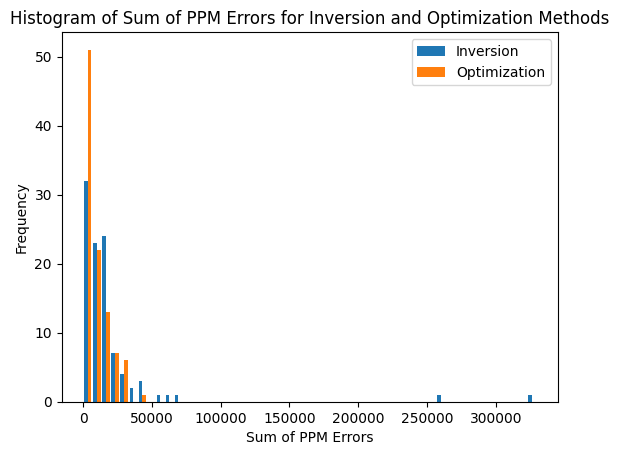

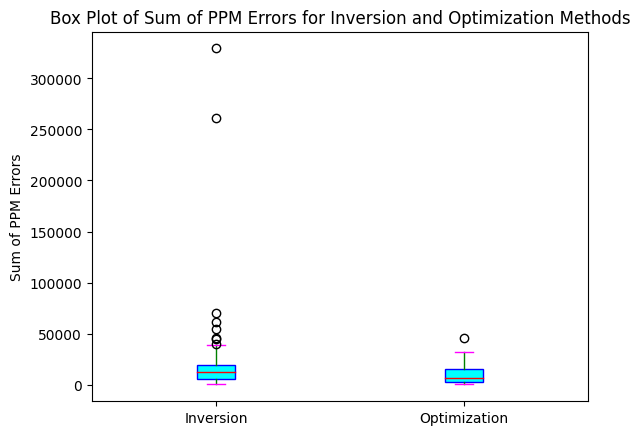

Average of PPM Inversion Errors: 20079.051981153836
Average of PPM Optimization Errors: 9771.11981277691
Standard Deviation of PPM Errors : Inversion Method: 41569.00312130437
Standard Deviation of PPM Errors : Optimization Method: 8876.5707782482
Average Difference between Optimization and Inversion PPM Errors: 10307.932168376927
Standard Deviation of Differences between Optimization and Inversion PPM Errors: 37376.446227752465


[[5440.579761208819,
  18769.03497488558,
  18822.59560695154,
  12757.494066207299,
  15833.464473711923,
  9293.59726826118,
  261191.97447941598,
  3572.716692722966,
  5283.242015049927,
  54745.04001509306,
  27618.616927591822,
  6030.551327056765,
  4517.7001032927765,
  61093.21644170751,
  10885.97087866583,
  2401.475528007291,
  7171.278616601718,
  4601.271978407429,
  10820.080545273391,
  5211.201399911935,
  22030.84818364054,
  5371.193765878801,
  3318.9674468688813,
  38503.07478351522,
  11835.305879569158,
  26795.400650757474,
  18582.169368208557,
  6363.720045278742,
  1479.4013012591201,
  14739.992477510232,
  461.7483605640071,
  4107.625350122324,
  19141.002106355278,
  38543.09155623614,
  17528.177803357692,
  12960.379952321688,
  3766.3192527522815,
  2566.396997062181,
  3710.175688570017,
  12509.013200441288,
  45250.180193213695,
  11166.624328974418,
  69805.56202751842,
  13825.994862526557,
  3810.32682546667,
  19673.806276587657,
  12645.8238135

In [45]:
# Repeat for the remaining two states
# For state 2 : tru = [m.pi/12, m.pi/2-m.pi/12, m.pi/4, m.pi/2, m.pi/3]   # 60 deg diff, non zero phi
tru2 = [m.pi/12, m.pi/2-m.pi/12, m.pi/4, m.pi/2, m.pi/3]
df_nju = pd.read_csv('collapses_(15 75 45 90 60) 1k 1k.csv')
nju_1000_2 = df_nju.head(1000).values.tolist()

for i in range(100):
    print(i, nju_1000_2[i])
    err = ppm_errors(tru2, nju_1000_2[i])
    if sum(err[0]) > 100000:
        print(i, nju_1000_2[i], err)

plot_ppm_errors(tru2, nju_1000_2[:100], bins = 50)

In [2]:
# rough debugging

tru2 = [m.pi/12, m.pi/2-m.pi/12, m.pi/4, m.pi/2, m.pi/3]

# bad_nju1 = nju_1000[55]
bad_nju2 = nju_1000[6]

# print(bad_nju1, bad_nju2)

# err1 = ppm_errors(tru2, bad_nju1)
err2 = ppm_errors(tru2, bad_nju2)

# (err1, err2)
err2

NameError: name 'nju_1000' is not defined

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x0).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Framew

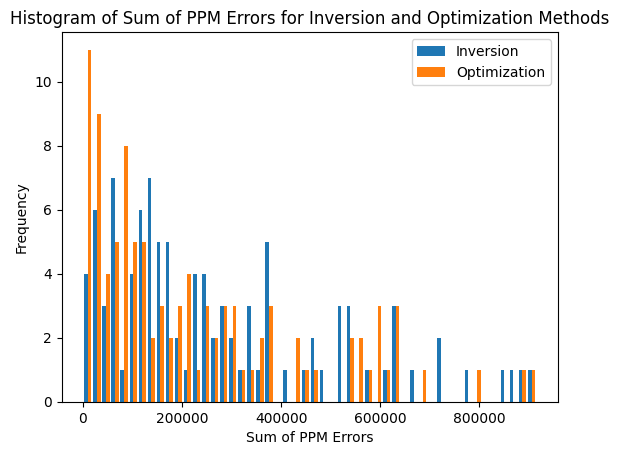

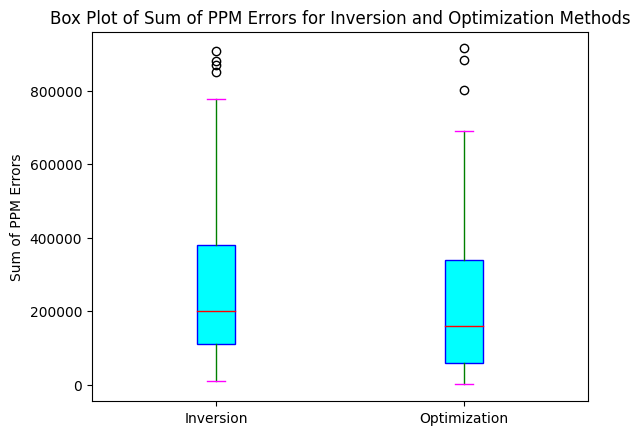

Average of PPM Inversion Errors: 275618.0087135632
Average of PPM Optimization Errors: 229455.61315957684
Standard Deviation of PPM Errors : Inversion Method: 227353.8803172221
Standard Deviation of PPM Errors : Optimization Method: 220219.10662065496
Average Difference between Optimization and Inversion PPM Errors: 46162.395553986404
Standard Deviation of Differences between Optimization and Inversion PPM Errors: 146270.1302141302


[[47130.7564732566,
  339821.7990408288,
  155651.3521164339,
  870098.2507178509,
  625077.339739286,
  139335.49151551284,
  55618.209662439804,
  35117.10931169787,
  167413.1598373053,
  93645.48557775222,
  128931.34510071501,
  158933.7774200117,
  879274.159906006,
  47647.91012398717,
  659269.460722408,
  248242.36631605678,
  264653.9165952993,
  204386.41865525773,
  125126.00962877407,
  17389.442463130123,
  196563.95488905275,
  379620.87620300835,
  305696.9453002206,
  123063.94549326906,
  124597.78524668374,
  12846.186439620544,
  775947.726295182,
  907523.5094119677,
  850237.2598874428,
  94538.40337975793,
  406872.9182888877,
  614482.6556575601,
  95053.332947574,
  58129.31333742199,
  143148.87906846174,
  32316.5487412872,
  373429.00478938874,
  282960.0529690489,
  635431.8100614185,
  445704.0676944886,
  123826.8200063124,
  249925.75804941653,
  222259.5502392919,
  181383.1675246267,
  231794.50171499618,
  289177.7982480143,
  185914.02442188642,
  13

In [28]:

# For state 3 : tru = [m.pi/6, m.pi/3, 0, m.pi/4, m.pi/12]                # 30 deg diff, very uneven alpha
df_nju = pd.read_csv('collapses_(30 60 0 45 15) 1k 1k.csv')
nju_1000_3 = df_nju.head(1000).values.tolist()
plot_ppm_errors(tru, nju_1000_3[:100], bins = 50)

In [8]:
# Assembling martins evaluation to add in overleaf

# tru state: [theta1, theta2, phi1, phi2, alpha] = [m.pi/6, m.pi/2+m.pi/6, m.pi/4, m.pi/2, m.pi/6].
tru_params = [m.pi/6, m.pi/2+m.pi/6, m.pi/4, m.pi/2, m.pi/6]
nju = [666.8670613173642, 542.267850618758, 1197.916666666669, 975.7351656601277, 2352.755640130231, 557.5922586427129, 1169.8977730225154, 1167.4765092510274, 1369.4910746906237]
# nju is same as probs
th_min = fnn.L(n = nju)
optimized_L = 2.095329260493815
optimized_params = [0.52359877660388, 2.09439512247384, 0.7853981820616893, 1.5707963651188, 0.5235987727309753]

fid = fnn.fid(tru_params, optimized_params)
ppm = [(1-i)*1e6 for i in fid]
ppm = [0.0, 6.661338147750939e-10]
fid


[1.0, 0.9999999999999993]